In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
import seaborn as sns

In [36]:
house = pd.read_csv('/Users/justinsheng/Library/CloudStorage/OneDrive-UniversityofToronto/Justin/Schulich_2023-2024/MBAN6110/kc_house_data.csv')

In [5]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
house.dropna(inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

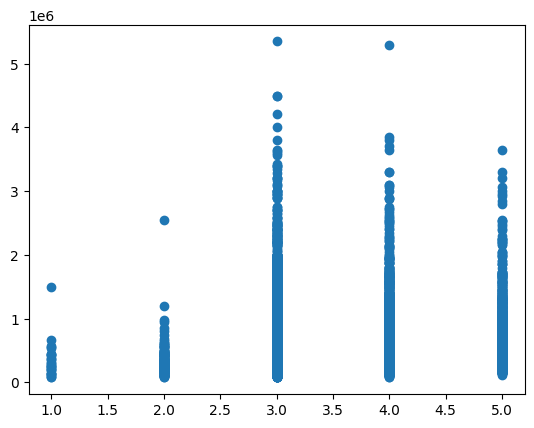

In [179]:
plt.scatter(house['condition'],house['price'])

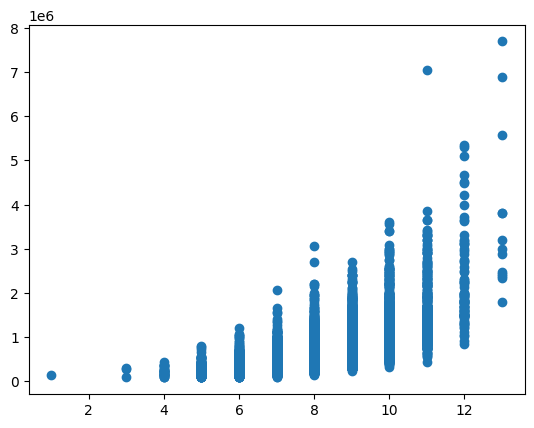

In [111]:
plt.scatter(house['grade'],house['price'])

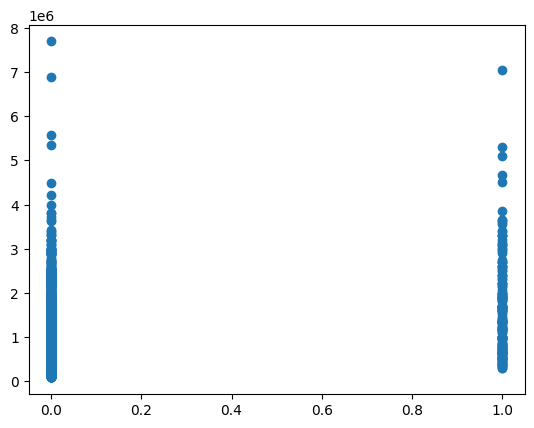

In [13]:
plt.scatter(house['waterfront'],house['price'])

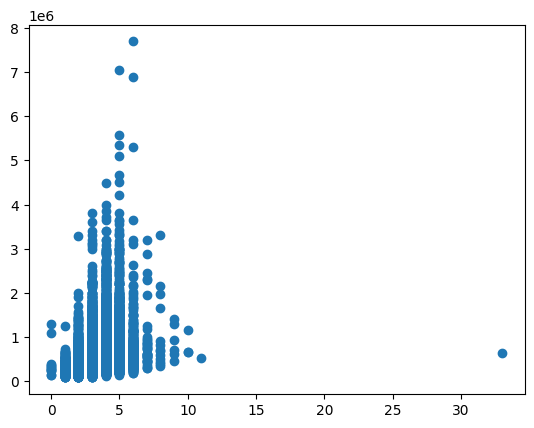

In [127]:
plt.scatter(house['bedrooms'],house['price'])

<Axes: ylabel='bedrooms'>

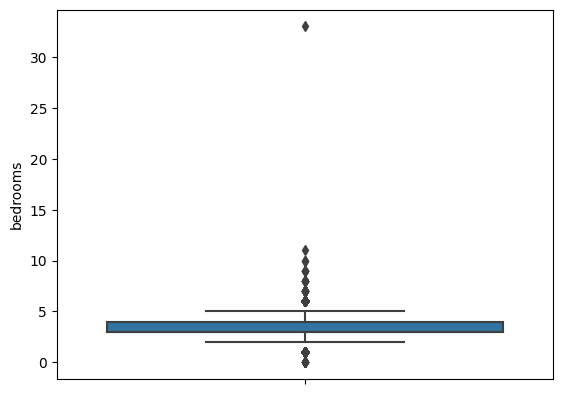

In [129]:
sns.boxplot(y = house['bedrooms'])

In [135]:
house[house["bedrooms"] > 15]
house[house["bedrooms"] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renov
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,0
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,0
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,0
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,390,0,1953,0,98118,47.5260,-122.261,2170,6000,0
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,0
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,0
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,0
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,0
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,0
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,0


In [136]:
house.drop(875, axis=0, inplace=True)
house.drop(3119, axis=0, inplace=True)
house.drop(3467, axis=0, inplace=True)
house.drop(4868, axis=0, inplace=True)
house.drop(6994, axis=0, inplace=True)
house.drop(8477, axis=0, inplace=True)
house.drop(8484, axis=0, inplace=True)
house.drop(9773, axis=0, inplace=True)
house.drop(9854, axis=0, inplace=True)
house.drop(12653, axis=0, inplace=True)
house.drop(14423, axis=0, inplace=True)
house.drop(18379, axis=0, inplace=True)
house.drop(19452, axis=0, inplace=True)

<Axes: ylabel='bathrooms'>

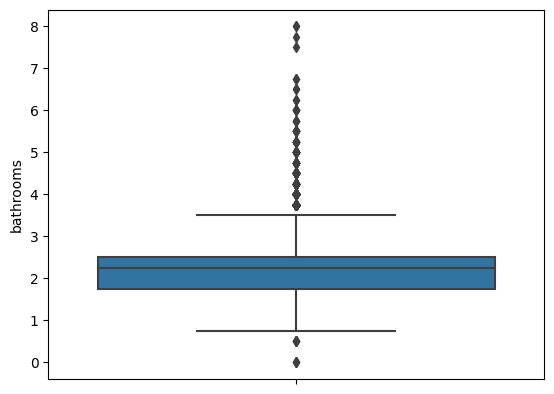

In [137]:
sns.boxplot(y = house['bathrooms'])

In [142]:
house[house["bathrooms"] > 6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renov
4024,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,...,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190,0
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,1
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,0
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,0
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,...,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,0
14556,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021,1
18302,6072800246,20140702T000000,3300000.0,5,6.25,8020,21738,2.0,0,0,...,8020,0,2001,0,98006,47.5675,-122.189,4160,18969,0
20578,424069279,20150328T000000,1180000.0,6,6.50,6260,10955,2.0,0,0,...,4840,1420,2007,0,98075,47.5947,-122.039,2710,12550,0
21506,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,0,...,6420,850,2010,0,98027,47.5371,-121.982,1800,44890,0


In [143]:
house.drop(4024, axis=0, inplace=True)
house.drop(7252, axis=0, inplace=True)
house.drop(8092, axis=0, inplace=True)
house.drop(8546, axis=0, inplace=True)
house.drop(9254, axis=0, inplace=True)
house.drop(12777, axis=0, inplace=True)
house.drop(14556, axis=0, inplace=True)
house.drop(18302, axis=0, inplace=True)
house.drop(20578, axis=0, inplace=True)
house.drop(21506, axis=0, inplace=True)

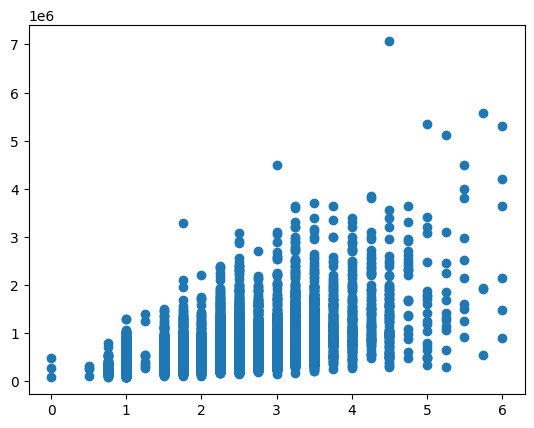

In [144]:
plt.scatter(house['bathrooms'],house['price'])

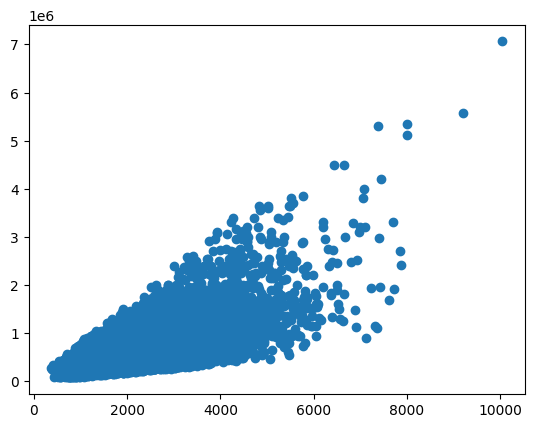

In [145]:
plt.scatter(house['sqft_living'],house['price'])

<Axes: ylabel='sqft_living'>

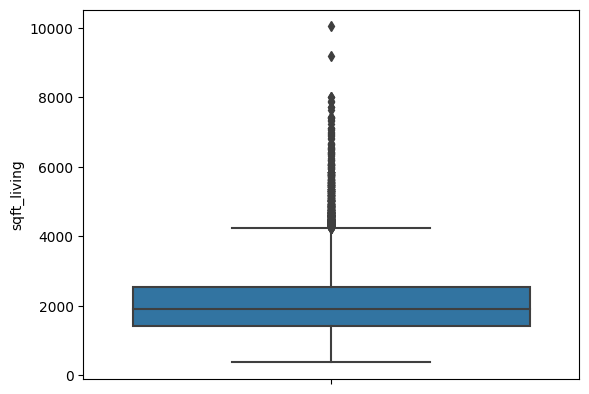

In [146]:
sns.boxplot(y = house['sqft_living'])

In [147]:
house[house["sqft_living"] > 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renov
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,0
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,1
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,0


In [148]:
house.drop(1164, axis=0, inplace=True)
house.drop(3914, axis=0, inplace=True)
house.drop(4411, axis=0, inplace=True)

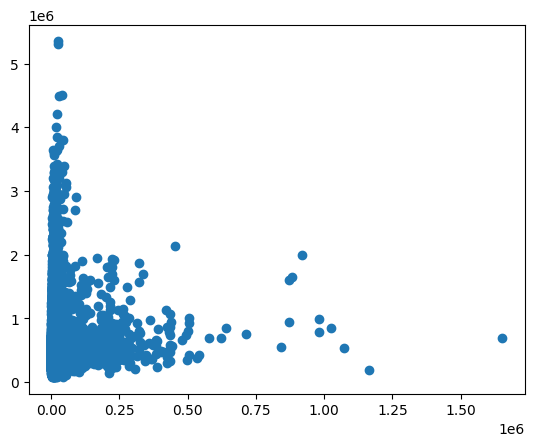

In [149]:
plt.scatter(house['sqft_lot'],house['price'])

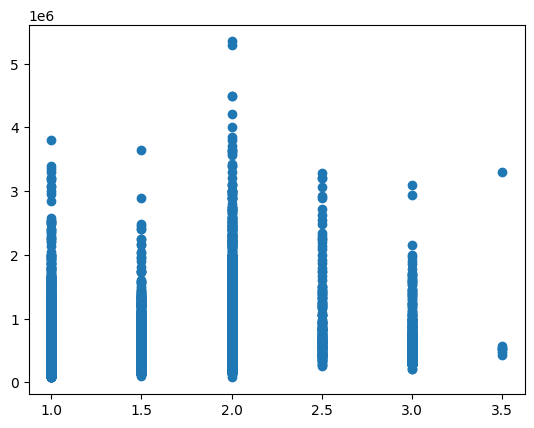

In [150]:
plt.scatter(house['floors'],house['price'])

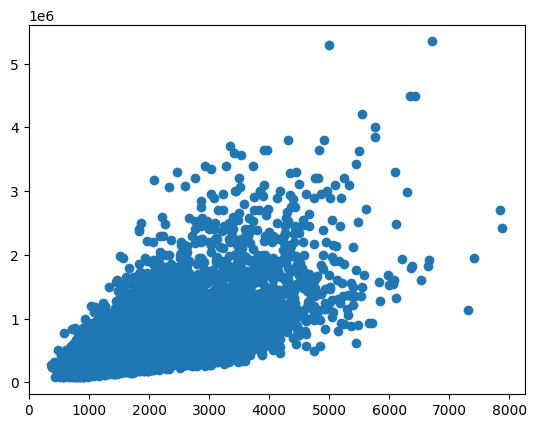

In [152]:
plt.scatter(house['sqft_above'],house['price'])

<Axes: ylabel='sqft_above'>

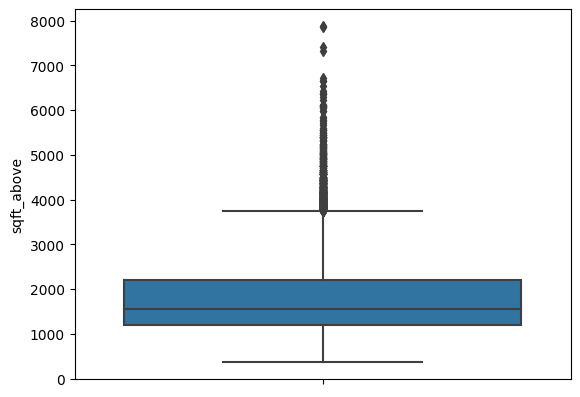

In [153]:
sns.boxplot(y = house['sqft_above'])

In [154]:
house[house["sqft_above"] > 7000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renov
11871,8835800350,20150112T000000,1950000.0,4,3.25,7420,167869,2.0,0,3,...,7420,0,2002,0,98045,47.4548,-121.764,5610,169549,0
13411,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,...,7880,0,1996,0,98177,47.7334,-122.362,2740,10761,0
18594,3023069166,20140708T000000,1135250.0,5,4.00,7320,217800,2.0,0,0,...,7320,0,1992,0,98058,47.4473,-122.086,3270,34500,0
19858,2524069078,20150122T000000,2700000.0,4,4.00,7850,89651,2.0,0,0,...,7850,0,2006,0,98027,47.5406,-121.982,6210,95832,0


In [155]:
house.drop(11871, axis=0, inplace=True)
house.drop(13411, axis=0, inplace=True)
house.drop(18594, axis=0, inplace=True)
house.drop(19858, axis=0, inplace=True)

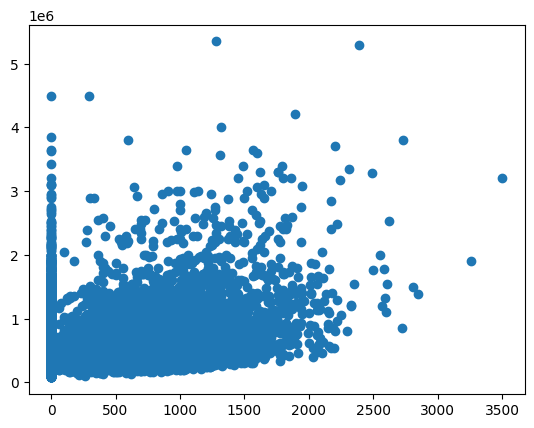

In [156]:
plt.scatter(house['sqft_basement'],house['price'])

<Axes: ylabel='sqft_basement'>

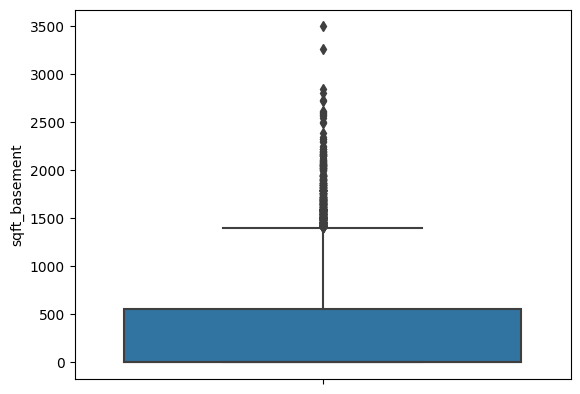

In [157]:
sns.boxplot(y = house['sqft_basement'])

In [158]:
house[house["sqft_basement"] > 3000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renov
10085,7767000060,20140912T000000,1900000.0,5,4.25,6510,16471,2.0,0,3,...,3250,3260,1980,0,98040,47.5758,-122.242,4480,16471,0
15482,624069108,20140812T000000,3200000.0,4,3.25,7000,28206,1.0,1,4,...,3500,3500,1991,0,98075,47.5928,-122.086,4913,14663,0


In [160]:
def renov(yr_renovated):
    if yr_renovated == 0: 
        return 0
    else:
        return 1

In [161]:
house['renov'] = house.apply(lambda x: renov(x['yr_renovated']), axis=1)

In [162]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renov
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [246]:
results = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + renov + zipcode + lat + long + sqft_living15 + sqft_lot15", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2987.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:41:13   Log-Likelihood:            -2.9318e+05
No. Observations:               21581   AIC:                         5.864e+05
Df Residuals:                   21563   BIC:                         5.865e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.199e+06    2.8e+06      1.854

In [247]:
results_1 = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + sqft_above + sqft_basement + yr_built + renov + zipcode + sqft_living15 + sqft_lot15", data=house).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2320.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:41:21   Log-Likelihood:            -2.9633e+05
No. Observations:               21581   AIC:                         5.927e+05
Df Residuals:                   21566   BIC:                         5.928e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.162e+06   3.22e+06     -2.227

In [248]:
results_2 = ols("price ~ bedrooms + bathrooms + sqft_living + floors + waterfront + view + condition + sqft_above + sqft_basement + yr_built + renov + zipcode + sqft_living15 + sqft_lot15", data=house).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2498.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:41:27   Log-Likelihood:            -2.9633e+05
No. Observations:               21581   AIC:                         5.927e+05
Df Residuals:                   21567   BIC:                         5.928e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.061e+06   3.21e+06     -2.197

In [250]:
results_3 = ols("price ~ bedrooms + bathrooms + sqft_living + waterfront + view + grade + sqft_above + sqft_basement + yr_built + renov + lat + long", data=house).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     4423.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:42:41   Log-Likelihood:            -2.9351e+05
No. Observations:               21581   AIC:                         5.870e+05
Df Residuals:                   21569   BIC:                         5.871e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.163e+07   1.43e+06    -22.165

In [167]:
results_4 = ols("price ~ bedrooms + bathrooms + floors + view + grade + sqft_above + sqft_basement + yr_built + renov + sqft_living15 + sqft_lot15 + lat + long", data=house).fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     3524.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:12:57   Log-Likelihood:            -2.9395e+05
No. Observations:               21581   AIC:                         5.879e+05
Df Residuals:                   21567   BIC:                         5.880e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.395e+07   1.56e+06    -21.809

In [168]:
results_5 = ols("price ~ bedrooms + bathrooms + floors + view + grade + sqft_above + sqft_basement + yr_built + renov + lat + long", data=house).fit()
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4136.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:13:00   Log-Likelihood:            -2.9400e+05
No. Observations:               21581   AIC:                         5.880e+05
Df Residuals:                   21569   BIC:                         5.881e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.246e+07    1.5e+06    -21.601

In [254]:
results_6 = ols("price ~ sqft_living + bedrooms + bathrooms + grade + renov + lat + long", data=house).fit()
print(results_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     5074.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:45:20   Log-Likelihood:            -2.9574e+05
No. Observations:               21581   AIC:                         5.915e+05
Df Residuals:                   21573   BIC:                         5.916e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.461e+07   1.36e+06    -47.359      

In [255]:
pred_vals = results_6.predict(house[['sqft_living','bedrooms', 'bathrooms', 'grade', 'sqft_above', 'sqft_basement', 'renov','lat', 'long']])

In [256]:
pred_vals

0        292392.399685
1        851513.047135
2        273402.276396
3        442582.615334
4        477150.788777
             ...      
21608    574270.718270
21609    601826.247564
21610    355366.535380
21611    409698.208590
21612    355186.334862
Length: 21581, dtype: float64

In [257]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),house['price']], axis=1)

In [258]:
res

,y_hat,price
0,292392.399685,221900.0
1,851513.047135,538000.0
2,273402.276396,180000.0
3,442582.615334,604000.0
4,477150.788777,510000.0
...,...,...
21608,574270.718270,360000.0
21609,601826.247564,400000.0
21610,355366.535380,402101.0
21611,409698.208590,400000.0


In [259]:
res['error'] = res['y_hat'] - res['price']

In [260]:
res['sq_error'] = res['error']**2

In [261]:
np.sqrt(res['sq_error'].mean())

216410.57471367356

In [317]:
categorical_features = ['renov', 'grade','bedrooms','bathrooms']
numerical_features = ['sqft_living', 'lat','long']
target = 'price'

In [318]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(house[categorical_features + numerical_features]
                                                    ,house[target],
                                                    test_size = 0.3, random_state=1234)

In [319]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [320]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [321]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [322]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['renov', 'grade', 'bedrooms',
                                                   'bathrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'lat',
                                                   'long'])])),
                ('regressor', LinearRegression())])

In [323]:
pred = linear_regression.predict(X_test)

In [324]:
pred

array([ 235386.0634842 ,  524909.92534723,  387888.21044547, ...,
        298232.41559371, 1109268.4184335 ,  541932.90006953])

In [325]:
from sklearn.metrics import mean_squared_error

In [326]:
np.sqrt(mean_squared_error(pred,y_test))

199049.63286413273

In [327]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [328]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['renov', 'grade', 'bedrooms',
                                                   'bathrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'lat',
                                                   'long'])])),
                ('regressor', Ridge(alpha=3.0))])

In [329]:
pred_ridge = ridge_regression.predict(X_test)

In [330]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

198499.05470489108

In [331]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [332]:
lasso_regression.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40565765238456.0, tolerance: 189394159925.91852
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['renov', 'grade', 'bedrooms',
                                                   'bathrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'lat',
                                                   'long'])])),
                ('regressor', Lasso())])

In [333]:
lasso_pred = lasso_regression.predict(X_test)

In [334]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

199036.2920786175

In [335]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [336]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['renov', 'grade', 'bedrooms',
                                                   'bathrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'lat',
                                                   'long'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [338]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [339]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

221602.92634771016